<img src="https://github.com/gantian127/pymt_nwis/blob/master/docs/_static/logo.png?raw=true" width='600' align='center'></a>

## Introduction

[nwis](https://github.com/gantian127/nwis) package provides a set of functions that allows downloading of the National Water Information System datasets for data visualization and analysis. nwis package also includes a Basic Model Interface ([BMI](https://bmi.readthedocs.io/en/latest/)). 

[pymt_nwis](https://github.com/gantian127/pymt_nwis) package uses the BMI of nwis to convert it into a reusable, plug-and-play data component for [PyMT](https://pymt.readthedocs.io/en/latest/?badge=latest) modeling framework. This allows the National Water Information System datasets to be easily coupled with other datasets or models that expose a BMI.

**To install pymt_nwis, use the following command:**

In [ ]:
! pip install pymt_nwis

## Coding Example

Import nwis class and instantiate it. A configuration file (yaml file) is required to provide the parameter settings for data download. An example config_file.yaml is provided in the same folder with this Jupyter Notebook file. For more details of the parameters specified in the config.yaml file, please check with the link [here](https://nwis.readthedocs.io/en/latest/?badge=latest#parameter-settings).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cftime


from pymt.models import Nwis

# initiate a data component
data_comp = Nwis()
data_comp.initialize('config_file.yaml')

Use variable related methods to check the variable information of the dataset. There are multiple variables and we will check the detailed info of the "discharge" variable.

In [2]:
# get variable info
var_names = data_comp.output_var_names
print('All variable names: {}'.format(var_names))

var_name = 'discharge'
var_unit = data_comp.var_units(var_name)
var_location = data_comp.var_location(var_name)
var_type = data_comp.var_type(var_name)
var_grid = data_comp.var_grid(var_name)

print('variable_name: {} \nvar_unit: {} \nvar_location: {} \nvar_type: {} \nvar_grid: {}'.format(
    var_name, var_unit, var_location, var_type, var_grid))

All variable names: ('water temperature', 'discharge', 'gage height')
variable_name: discharge 
var_unit: cubic feet per second 
var_location: node 
var_type: float64 
var_grid: 0


Use time related methods to check the time information of the dataset. Please note that the time values are stored in a format which follows [CF convention](http://cfconventions.org/Data/cf-conventions/cf-conventions-1.8/cf-conventions.pdf).

In [3]:
# get time info
start_time = data_comp.start_time
end_time = data_comp.end_time
time_step = data_comp.time_step
time_units = data_comp.time_units
time_steps = int((end_time - start_time)/time_step) + 1

print('start_time: {} \nend_time: {} \ntime_step: {} \ntime_units: {} \ntime_steps: {}'.format(
    start_time, end_time, time_step, time_units, time_steps))

start_time: 1577836800.0 
end_time: 1579046400.0 
time_step: 86400 
time_units: seconds since 1970-01-01 00:00:00 UTC 
time_steps: 15


Loop through each time step to get the discharge and time values. stream_array stores the discharge values. cftime_array stores the numerical time values. time_array stores the corresponding Python datetime objects. get_value( ) method returns the flow forecast value at each time step. update( ) method updates the current time step of the data component.

In [4]:
# get variable data
stream_array = np.empty(time_steps)
cftime_array = np.empty(time_steps)

for i in range(0, time_steps):
    stream_array[i] = data_comp.get_value(var_name)
    cftime_array[i] = data_comp.time
    data_comp.update()

time_array = cftime.num2date(cftime_array, time_units, only_use_cftime_datetimes=False, only_use_python_datetimes=True )


Now let's make a plot of the discharge data. 

Text(0.5, 1.0, 'Discharge Observation at USGS Gage 03339000')

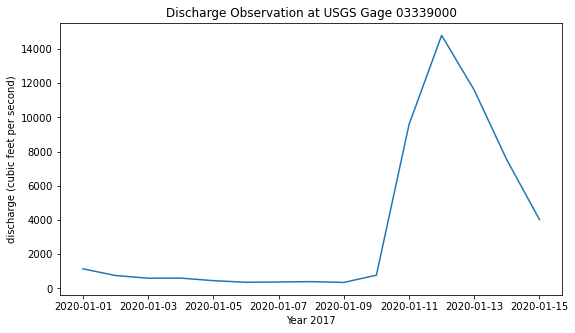

In [5]:
# plot data
plt.figure(figsize=(9,5))
plt.plot(time_array, stream_array)
plt.xlabel('Year 2017')
plt.ylabel('{} ({})'.format(var_name, var_unit))
plt.title('Discharge Observation at USGS Gage 03339000')

Complete the example by finalizing the component.

In [6]:
data_comp.finalize()